In [1]:
#Using torchvision.datasets.CIFAR10 load the CIFAR10 dataset
import pytorch_mlp as mlp
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch import optim
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [2]:
model = mlp.MLP(n_inputs=3*32*32, n_hidden=[100, 50], n_classes=10).to(device)

In [3]:

LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 300
EVAL_FREQ_DEFAULT = 2

In [4]:


criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE_DEFAULT)
train_acc=[]
test_acc=[]
train_loss=[]
test_loss=[]
for epoch in range(MAX_EPOCHS_DEFAULT):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        inputs = inputs.view(-1, 3*32*32)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    with torch.no_grad():
        model.eval()
        correct = 0
        total = 0
        running_loss = 0.0
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.view(-1, 3*32*32)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            running_loss += loss.item()
        test_loss.append(running_loss)
        test_acc.append(correct / total)
        running_loss = 0.0
        correct = 0
        total = 0
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.view(-1, 3*32*32)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            running_loss += loss.item()
        train_loss.append(running_loss)
        train_acc.append(correct / total)
        if epoch % EVAL_FREQ_DEFAULT == 0:
            print(f'Epoch {epoch + 1}, Train Loss: {train_loss[-1]}, Train Acc: {train_acc[-1]}, Test Loss: {test_loss[-1]}, Test Acc: {test_acc[-1]}')
    

Epoch 1, Train Loss: 18706.237133026123, Train Acc: 0.47534, Test Loss: 3834.845917209983, Test Acc: 0.4649
Epoch 3, Train Loss: 16405.74879910052, Train Acc: 0.5363, Test Loss: 3566.829582259059, Test Acc: 0.4952
Epoch 5, Train Loss: 15091.044338583946, Train Acc: 0.57026, Test Loss: 3492.346989043057, Test Acc: 0.5125
Epoch 7, Train Loss: 14353.588781824335, Train Acc: 0.5892, Test Loss: 3555.78492179513, Test Acc: 0.5086
Epoch 9, Train Loss: 14008.117877554148, Train Acc: 0.59102, Test Loss: 3592.85019069165, Test Acc: 0.4958
Epoch 11, Train Loss: 13043.775238944218, Train Acc: 0.6268, Test Loss: 3636.4486304447055, Test Acc: 0.5064
Epoch 13, Train Loss: 12811.704533874989, Train Acc: 0.6349, Test Loss: 3732.226837158203, Test Acc: 0.5072
Epoch 15, Train Loss: 12074.180280814413, Train Acc: 0.65578, Test Loss: 3821.8784836791456, Test Acc: 0.5033
Epoch 17, Train Loss: 11606.162108355202, Train Acc: 0.66266, Test Loss: 3874.885719485581, Test Acc: 0.497
Epoch 19, Train Loss: 11164.32

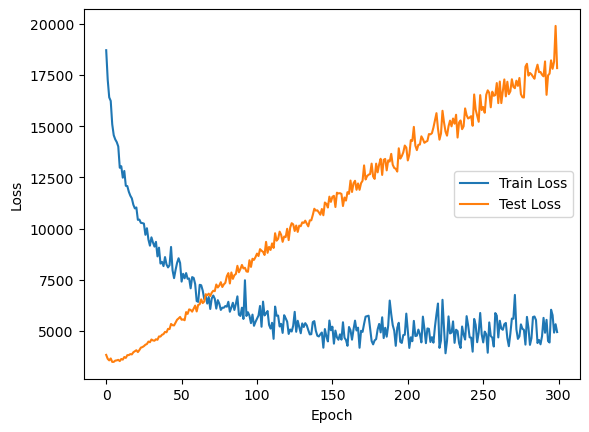

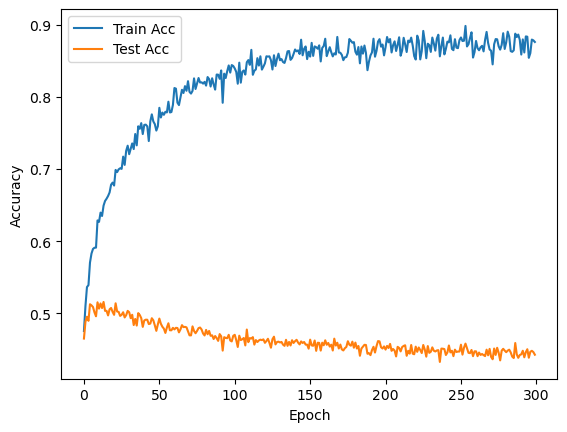

In [5]:
# Plot the training and test loss
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(train_acc, label='Train Acc')
plt.plot(test_acc, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [6]:

from torch.optim.lr_scheduler import StepLR

# Define the model architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Add dropout layer with 50% probability

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

# Initialize the model, criterion, and optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE_DEFAULT, weight_decay=1e-2)  # Add weight decay for regularization

# Learning rate scheduler
scheduler = StepLR(optimizer, step_size=10, gamma=0.1) 
train_acc = []
test_acc = []
train_loss = []
test_loss = []


# Training loop
for epoch in range(MAX_EPOCHS_DEFAULT):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    scheduler.step()
    with torch.no_grad():
        model.eval()
        correct = 0
        total = 0
        running_loss = 0.0
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            running_loss += loss.item()
        test_loss.append(running_loss)
        test_acc.append(correct / total)
        running_loss = 0.0
        correct = 0
        total = 0
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs, labels)
            running_loss += loss.item()
        train_loss.append(running_loss)
        train_acc.append(correct / total)
        if epoch % EVAL_FREQ_DEFAULT == 0:
            print(f'Epoch {epoch + 1}, Train Loss: {train_loss[-1]}, Train Acc: {train_acc[-1]}, Test Loss: {test_loss[-1]}, Test Acc: {test_acc[-1]}')


Epoch 1, Train Loss: 21996.29322475195, Train Acc: 0.36514, Test Loss: 4397.17253112793, Test Acc: 0.3611
Epoch 3, Train Loss: 21522.929254353046, Train Acc: 0.3936, Test Loss: 4314.403760075569, Test Acc: 0.3883
Epoch 5, Train Loss: 21230.597349345684, Train Acc: 0.40392, Test Loss: 4255.2913863658905, Test Acc: 0.4052
Epoch 7, Train Loss: 21286.015316605568, Train Acc: 0.38618, Test Loss: 4261.23961943388, Test Acc: 0.3837
Epoch 9, Train Loss: 21276.322765648365, Train Acc: 0.41486, Test Loss: 4270.700486958027, Test Acc: 0.4104
Epoch 11, Train Loss: 20374.015249729156, Train Acc: 0.43042, Test Loss: 4089.4024950265884, Test Acc: 0.4285
Epoch 13, Train Loss: 20068.818074673414, Train Acc: 0.4431, Test Loss: 4044.927278637886, Test Acc: 0.4421
Epoch 15, Train Loss: 19809.083456873894, Train Acc: 0.45176, Test Loss: 3998.041676402092, Test Acc: 0.4477
Epoch 17, Train Loss: 19731.139209151268, Train Acc: 0.45086, Test Loss: 3987.5155591368675, Test Acc: 0.4455
Epoch 19, Train Loss: 1963

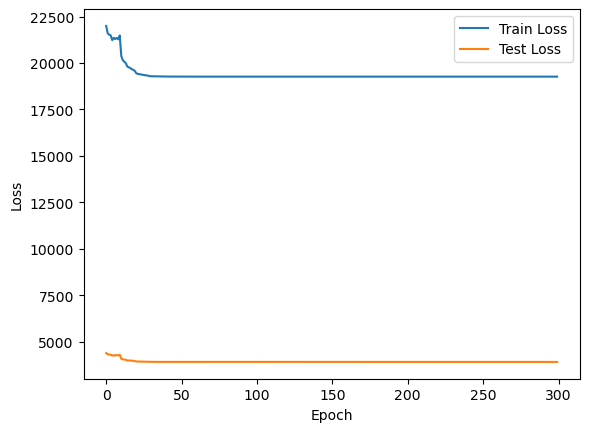

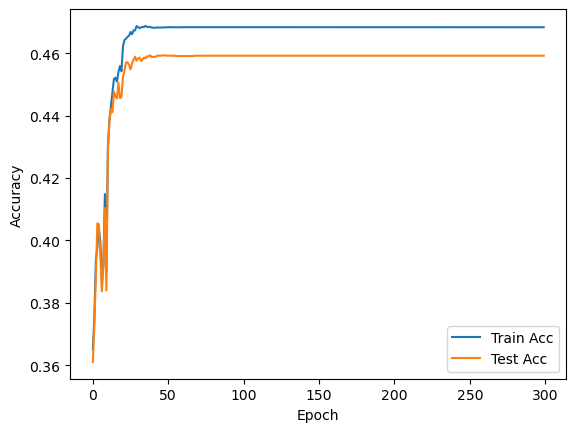

In [7]:
# Plot the training and test loss
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(train_acc, label='Train Acc')
plt.plot(test_acc, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
